In [1]:
missing_modules = """
  Uncomment the lines in the next cell and execute them to install a new conda environment 
  and a Jupyter kernel. After the kernel is created, refresh the webpage.
  Then, you should see jhub_tensorflow kernel, in the `Kernel/Change kernel` menu on top.
  
  """
try:
    import tensorflow as tf
except:
    print('Tensorflow is not installed:', missing_modules)
try:
    import pandas as pd
except:
    print('Pandas is not installed:', missing_modules)
try:
    import matplotlib
except:
    print('Matplotlib is not installed:', missing_modules)

In [2]:
## Step 1
## Create a new conda environment
#!conda create -y -n jhub_tensorflow

## Step 2
## After activating the environment, install the modules tou want.
## You need to install jupyter nb_conda ipykernel modules as well.
## This part can take a long time, take a coffee break
#!source activate jhub_tensorflow; conda install -y jupyter nb_conda ipykernel tensorflow matplotlib pandas

## Step 3
## Install Jupyter kernel
#!source activate jhub_tensorflow; python -m ipykernel install --user --name jhub_tensorflow

## You can repeat Step 2, whenever you need to install a new module to the same kernel.
##!source activate jhub_tensorflow; conda install -y newmodule
## You can omit jupyter, nb_conda, ipykernel as you have already installed.

In [6]:
# A simple test based on the Tensorflow tutorial: https://www.tensorflow.org/tutorials
# Run a single epoch for mnist, should take about 10 seconds.

import tensorflow as tf
import time
import numpy as np
import sys
import datetime
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(x_train, y_train, epochs=1)
runtime = time.time() - start
loss, acc = model.evaluate(x_test, y_test)

# Record the versions, runtime and model metrics into a csv file.
record = f'{datetime.datetime.now()},{sys.version.split()[0]},{tf.__version__},{np.__version__},{loss:3f},{acc:.3f},{runtime:.3f}\n'
csvfile = '/lus/theta-fs0/projects/datascience/jupyterhub/tensorflow.csv'
with open(csvfile, 'a') as f:
        f.write(record)

# Read csv file into a Pandas dataframe and print min,max, mean and standard deviation values.
import pandas as pd
df = pd.read_csv(csvfile)
df.describe()

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.2257 - acc: 0.9351


,Loss,Accuracy,Time
count,8.000000,8.000000,8.000000
mean,0.226027,0.934375,15.425000
std,0.004857,0.001408,11.953302
min,0.215710,0.933000,7.371000
25%,0.225224,0.933000,8.982750
50%,0.226394,0.934500,9.423000
75%,0.229078,0.935000,16.240000
max,0.231852,0.937000,34.890000


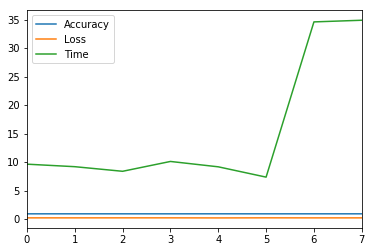

In [7]:
# A simple plot of accuracy, loss, and runtime.
%matplotlib inline
df.Accuracy.plot(label='Accuracy')
df.Loss.plot()
ax = df.Time.plot()
ax.legend()

In [8]:
df

,Date,Python_version,Tensorflow_version,Numpy_version,Loss,Accuracy,Time
0,2019-07-05 21:50:54.707166,3.6.8,1.13.1,1.16.2,0.226852,0.933,9.644
1,2019-07-05 21:51:39.828420,3.6.8,1.13.1,1.16.2,0.225936,0.935,9.202
2,2019-07-05 22:03:57.582148,3.6.8,1.13.1,1.16.2,0.229273,0.934,8.394
3,2019-07-05 22:07:14.543136,3.6.8,1.13.1,1.16.2,0.229013,0.933,10.120
4,2019-07-05 22:27:40.154685,3.6.8,1.13.1,1.16.2,0.215710,0.937,9.179
5,2019-07-14 18:21:11.680041,3.6.8,1.13.1,1.16.2,0.231852,0.933,7.371
6,2019-08-05 20:50:08.472950,3.6.8,1.13.1,1.16.2,0.223917,0.935,34.600
7,2019-08-05 20:51:22.525772,3.6.8,1.13.1,1.16.2,0.225660,0.935,34.890
